In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Datasets\Housing.csv")
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
cat_col = ['mainroad', 'guestroom', 'basement','hotwaterheating','airconditioning','prefarea', 'furnishingstatus']
for col in cat_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
print(dict(zip(le.classes_, sorted(df[col].unique()))))

{'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2}


In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [11]:
X = df.iloc[: ,1:]
Y = df['price']
print(X.shape)
print(Y.shape)

(545, 12)
(545,)


In [13]:
from sklearn.model_selection import train_test_split
Xtrain, xtest, Ytrain, ytest = train_test_split(X,Y, test_size=0.20, random_state=20)

In [15]:
Xtrain.shape, xtest.shape, Ytrain.shape, ytest.shape

((436, 12), (109, 12), (436,), (109,))

<Axes: >

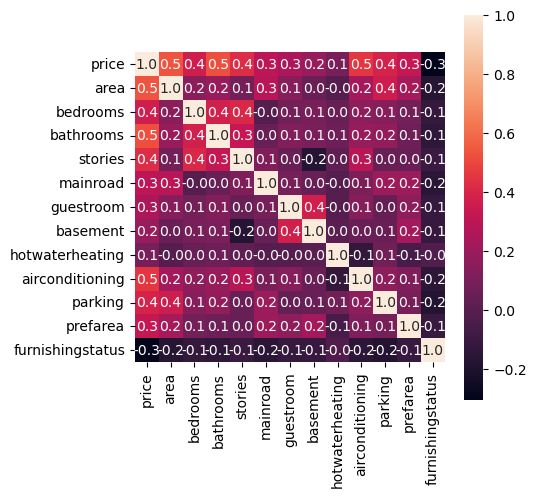

In [17]:
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, cbar=True, square=True, fmt='.1f', annot=True)

In [130]:
# Unstack and filter
cor_pairs = corr_matrix.unstack()
high_cor = cor_pairs[(abs(cor_pairs) > 0.8) & (abs(cor_pairs) < 1.0)]
high_cor = high_cor.sort_values(ascending=False)
print(high_cor)


Series([], dtype: float64)


In [18]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(Xtrain,Ytrain)
pred = lr.predict(xtest)

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_absolute_error(ytest, pred), mean_squared_error(ytest,pred), r2_score(ytest,pred)

(829887.1989631354, 1188685784790.701, 0.6792992493731589)

In [24]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(Xtrain,Ytrain)

DecisionTreeRegressor()

In [26]:
predi = dt.predict(xtest)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_absolute_error(ytest, predi), mean_squared_error(ytest,predi), r2_score(ytest,predi)

(1124586.605504587, 2458053503519.266, 0.33683096597443873)

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300,max_depth=10, random_state=20)
rf.fit(Xtrain, Ytrain)
pr = rf.predict(xtest)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_absolute_error(ytest, pr), mean_squared_error(ytest,pr), r2_score(ytest,pr)

(835818.5050625976, 1380300773424.1553, 0.6276026012998226)

In [56]:
from xgboost import XGBRegressor

model = XGBRegressor(max_depth=2, learning_rate=0.1, random_state=42, eta=0.01)
model.fit(Xtrain, Ytrain)
p = model.predict(xtest)

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_absolute_error(ytest, p), mean_squared_error(ytest,p), r2_score(ytest,p)

(828369.4380733945, 1305709063420.9375, 0.6477270126342773)

In [80]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [94]:
param_grid = { 'max_depth':[3,7,9], 'learning_rate' : [0.01,0.1]}
gridsearch = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2')
gridsearch.fit(Xtrain, Ytrain)
pt = gridsearch.predict(xtest)

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_absolute_error(ytest, pt), mean_squared_error(ytest,pt), r2_score(ytest,pt)

(838766.5619266055, 1260686609397.355, 0.6598738431930542)

In [112]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],  # new param
    'min_child_weight': [1, 3, 5],  # new param
}

In [114]:
rs = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring='r2')
rs.fit(Xtrain,Ytrain)
pct=rs.predict(xtest)

In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_absolute_error(ytest, pct), mean_squared_error(ytest,pct), r2_score(ytest,pct)

(779167.5733944954, 1237301546229.9749, 0.6661829948425293)